# Text Processing

## Capturing Text Data

In [1]:
# Plain Text
import os
with open(os.path.join("data", "input.txt"), "r") as f:
    text = f.read()

    
# Tabular Data
import pandas as pd
df = pd.read_csv(os.path.join("data", "news.csv"))
df['title'] = df['title'].str.lower() # Convert text column to lowercase
#df.head()[['publisher', 'title']]


# Online Resource

import requests
import json
# Fetch data from a REST API
r = requests.get("https://quotes.rest/qod.json")
res = r.json()
#print(json.dumps(res, indent=4))
# Extract relevant object and field
q = res["contents"]["quotes"][0]
#print(q["quote"], "\n--", q["author"])

# Fetch a web page
r = requests.get("https://www.udacity.com/courses/all")
print(r.text[:50])

<!DOCTYPE html>
<html>
<head>
  <meta name="csrf-p


## Cleaning

In [2]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
#print(soup.get_text()[:50])

# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all("div", class_="course-summary-card")
for summary in summaries:
    title = summary.select_one("h3 a").get_text().strip()
    description = summary.select_one("div[data-course-short-summary]").get_text().strip()
    courses.append((title, description))

print(len(courses), "course summaries found. Sample:")
print(courses[0][0])
print(courses[0][1])

203 course summaries found. Sample:
React Nanodegree
React is completely transforming Front-End Development. Master this powerful UI library from Facebook with Udacity and the experts from React Training.



## Normalization

In [3]:
# Natural Language Toolkit 

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."

# Split text into words using NLTK
words = word_tokenize(text)
print(words,"\n")

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.'] 

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [4]:
import re
from nltk.corpus import stopwords
#print(stopwords.words("english"))

text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()

# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Stemming & Lemmatization

### Stemming

In [5]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [6]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [7]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [8]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Sentence Parsing

In [9]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


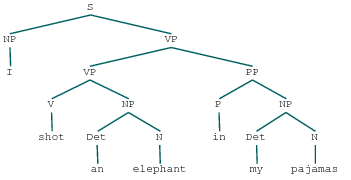

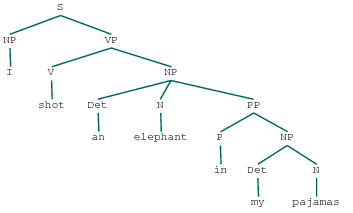

In [10]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

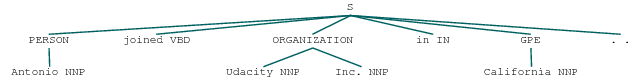

In [11]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)